<a href="https://colab.research.google.com/github/tcnl/if697-projeto-01/blob/master/Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   coletar dados
2.   pré processamento
  - definição de tipos
  - tratamento de dados ausentes
  - normalização e discretização
  - limpeza de dados (univariado, bivariado, multivariado)
3. estatísticas descritivas com visualizações
4. teste de hipóteses de categorias e visualizar diferenças




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import timedelta
import numpy as np

# Funções

In [ ]:
def describe_more(column):
  desc = {
    "median": column.median(),
    "mode": column.mode(),
    "variance": column.var()      
  }

  return desc

def normalize(column):
  min = column.min()
  max = column.max()

  return (column - min)/(max - min)

# Clima: pré-processamento

In [ ]:
url_clima = 'https://raw.githubusercontent.com/tcnl/if697-projeto-01/master/data/INMET_NE_PE_A301_RECIFE_01-01-2019_A_31-12-2019.CSV'

In [ ]:
## Importar apenas os dados, ignorando linhas de informação presentes no CSV original
clima_dados = pd.read_csv(url_clima, skiprows=[0,1,2,3,4,5,6,7], sep=';', error_bad_lines=False, encoding='cp1252')

## Remover colunas vazias
clima_dados.dropna(axis=1, how='all', inplace=True)

In [ ]:
# Colunas não relevantes, redundantes ou com muitos dados faltantes
clima_dados.drop(columns=['PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)', 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 
                          'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)', 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 
                          'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 
                          'VENTO, RAJADA MAXIMA (m/s)', 'VENTO, VELOCIDADE HORARIA (m/s)', 'RADIACAO GLOBAL (KJ/m²)'
                         ], inplace=True)

In [ ]:
## Substituir vírgulas por pontos
clima_dados.replace({',': '.'}, regex=True, inplace=True)

In [ ]:
clima_dados

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)"
0,2019/01/01,0000 UTC,0,1013,27,22.2,75.0
1,2019/01/01,0100 UTC,0,1012.8,26.7,22,76.0
2,2019/01/01,0200 UTC,0,1012.5,26.6,22.1,76.0
3,2019/01/01,0300 UTC,0,1011.8,26.3,22,77.0
4,2019/01/01,0400 UTC,0,1011.4,26.1,21.8,77.0
...,...,...,...,...,...,...,...
8755,2019/12/31,1900 UTC,0,1008.6,29,21.4,64.0
8756,2019/12/31,2000 UTC,0,1008.9,28.1,20.8,65.0
8757,2019/12/31,2100 UTC,0,1009.5,27.5,21.3,69.0
8758,2019/12/31,2200 UTC,0,1010.3,27.5,21.8,71.0


In [ ]:
clima_dados.dtypes

Data                                                      object
Hora UTC                                                  object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                          object
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)     object
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)              object
TEMPERATURA DO PONTO DE ORVALHO (°C)                      object
UMIDADE RELATIVA DO AR, HORARIA (%)                      float64
dtype: object

In [ ]:
#Combina as colunas de data e hora em uma só
#Transforma em tipo datetime
clima_dados_datahora = pd.to_datetime((clima_dados['Data'] + ' ' + clima_dados['Hora UTC']), format="%Y/%m/%d %H%M UTC")

In [ ]:
clima_dados

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)"
0,2019/01/01,0000 UTC,0,1013,27,22.2,75.0
1,2019/01/01,0100 UTC,0,1012.8,26.7,22,76.0
2,2019/01/01,0200 UTC,0,1012.5,26.6,22.1,76.0
3,2019/01/01,0300 UTC,0,1011.8,26.3,22,77.0
4,2019/01/01,0400 UTC,0,1011.4,26.1,21.8,77.0
...,...,...,...,...,...,...,...
8755,2019/12/31,1900 UTC,0,1008.6,29,21.4,64.0
8756,2019/12/31,2000 UTC,0,1008.9,28.1,20.8,65.0
8757,2019/12/31,2100 UTC,0,1009.5,27.5,21.3,69.0
8758,2019/12/31,2200 UTC,0,1010.3,27.5,21.8,71.0


In [ ]:
clima_dados_datahora

0      2019-01-01 00:00:00
1      2019-01-01 01:00:00
2      2019-01-01 02:00:00
3      2019-01-01 03:00:00
4      2019-01-01 04:00:00
               ...        
8755   2019-12-31 19:00:00
8756   2019-12-31 20:00:00
8757   2019-12-31 21:00:00
8758   2019-12-31 22:00:00
8759   2019-12-31 23:00:00
Length: 8760, dtype: datetime64[ns]

In [ ]:
# conversão UTC 0 ---> UTC -3
clima_dados_datahora = clima_dados_datahora.apply(lambda dh: dh + timedelta(hours=-3))
clima_dados_datahora

0      2018-12-31 21:00:00
1      2018-12-31 22:00:00
2      2018-12-31 23:00:00
3      2019-01-01 00:00:00
4      2019-01-01 01:00:00
               ...        
8755   2019-12-31 16:00:00
8756   2019-12-31 17:00:00
8757   2019-12-31 18:00:00
8758   2019-12-31 19:00:00
8759   2019-12-31 20:00:00
Length: 8760, dtype: datetime64[ns]

In [ ]:
#Remove as colunas de data e hora
clima_dados.drop(columns=['Data', 'Hora UTC'], inplace=True)
clima_dados

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)"
0,0,1013,27,22.2,75.0
1,0,1012.8,26.7,22,76.0
2,0,1012.5,26.6,22.1,76.0
3,0,1011.8,26.3,22,77.0
4,0,1011.4,26.1,21.8,77.0
...,...,...,...,...,...
8755,0,1008.6,29,21.4,64.0
8756,0,1008.9,28.1,20.8,65.0
8757,0,1009.5,27.5,21.3,69.0
8758,0,1010.3,27.5,21.8,71.0


In [ ]:
clima_dados.dtypes

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                          object
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)     object
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)              object
TEMPERATURA DO PONTO DE ORVALHO (°C)                      object
UMIDADE RELATIVA DO AR, HORARIA (%)                      float64
dtype: object

In [ ]:
#Transforma em float
clima_dados = clima_dados.apply(pd.to_numeric)
clima_dados.dtypes

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    float64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             float64
TEMPERATURA DO PONTO DE ORVALHO (°C)                     float64
UMIDADE RELATIVA DO AR, HORARIA (%)                      float64
dtype: object

In [ ]:
#normalização
clima_dados = clima_dados.apply(lambda x: normalize(x))
clima_dados

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)"
0,0.0,0.496454,0.531646,0.587719,0.648148
1,0.0,0.482270,0.512658,0.570175,0.666667
2,0.0,0.460993,0.506329,0.578947,0.666667
3,0.0,0.411348,0.487342,0.570175,0.685185
4,0.0,0.382979,0.474684,0.552632,0.685185
...,...,...,...,...,...
8755,0.0,0.184397,0.658228,0.517544,0.444444
8756,0.0,0.205674,0.601266,0.464912,0.462963
8757,0.0,0.248227,0.563291,0.508772,0.537037
8758,0.0,0.304965,0.563291,0.552632,0.574074


In [ ]:
#Insere datahora
clima_dados.insert(0, 'data_hora', clima_dados_datahora)
clima_dados.dtypes

data_hora                                                datetime64[ns]
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                                float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)           float64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                    float64
TEMPERATURA DO PONTO DE ORVALHO (°C)                            float64
UMIDADE RELATIVA DO AR, HORARIA (%)                             float64
dtype: object

In [ ]:
clima_dados

,data_hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)"
0,2018-12-31 21:00:00,0.0,0.496454,0.531646,0.587719,0.648148
1,2018-12-31 22:00:00,0.0,0.482270,0.512658,0.570175,0.666667
2,2018-12-31 23:00:00,0.0,0.460993,0.506329,0.578947,0.666667
3,2019-01-01 00:00:00,0.0,0.411348,0.487342,0.570175,0.685185
4,2019-01-01 01:00:00,0.0,0.382979,0.474684,0.552632,0.685185
...,...,...,...,...,...,...
8755,2019-12-31 16:00:00,0.0,0.184397,0.658228,0.517544,0.444444
8756,2019-12-31 17:00:00,0.0,0.205674,0.601266,0.464912,0.462963
8757,2019-12-31 18:00:00,0.0,0.248227,0.563291,0.508772,0.537037
8758,2019-12-31 19:00:00,0.0,0.304965,0.563291,0.552632,0.574074


In [ ]:
#existem algumas linhas sem dados, apenas data e hora
vazios = clima_dados[clima_dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].isnull()]
vazios

,data_hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)"
4110,2019-06-21 03:00:00,NaN,NaN,NaN,NaN,NaN
4234,2019-06-26 07:00:00,NaN,NaN,NaN,NaN,NaN
4450,2019-07-05 07:00:00,NaN,NaN,NaN,NaN,NaN
5789,2019-08-30 02:00:00,NaN,NaN,NaN,NaN,NaN
8613,2019-12-25 18:00:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
vazios.index

Int64Index([4110, 4234, 4450, 5789, 8613], dtype='int64')

In [ ]:
#Remove as linhas de 2018
#remove as linhas vazias
#e refaz os índices
clima_dados.drop(vazios.index, inplace=True)
clima_dados.drop([0,1,2], inplace=True)
clima_dados.reset_index(inplace=True,drop = True)

In [ ]:
clima_dados

,data_hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)"
0,2019-01-01 00:00:00,0.0,0.411348,0.487342,0.570175,0.685185
1,2019-01-01 01:00:00,0.0,0.382979,0.474684,0.552632,0.685185
2,2019-01-01 02:00:00,0.0,0.404255,0.474684,0.552632,0.685185
3,2019-01-01 03:00:00,0.0,0.432624,0.455696,0.543860,0.703704
4,2019-01-01 04:00:00,0.0,0.460993,0.455696,0.570175,0.740741
...,...,...,...,...,...,...
8747,2019-12-31 16:00:00,0.0,0.184397,0.658228,0.517544,0.444444
8748,2019-12-31 17:00:00,0.0,0.205674,0.601266,0.464912,0.462963
8749,2019-12-31 18:00:00,0.0,0.248227,0.563291,0.508772,0.537037
8750,2019-12-31 19:00:00,0.0,0.304965,0.563291,0.552632,0.574074


# Clima: plots

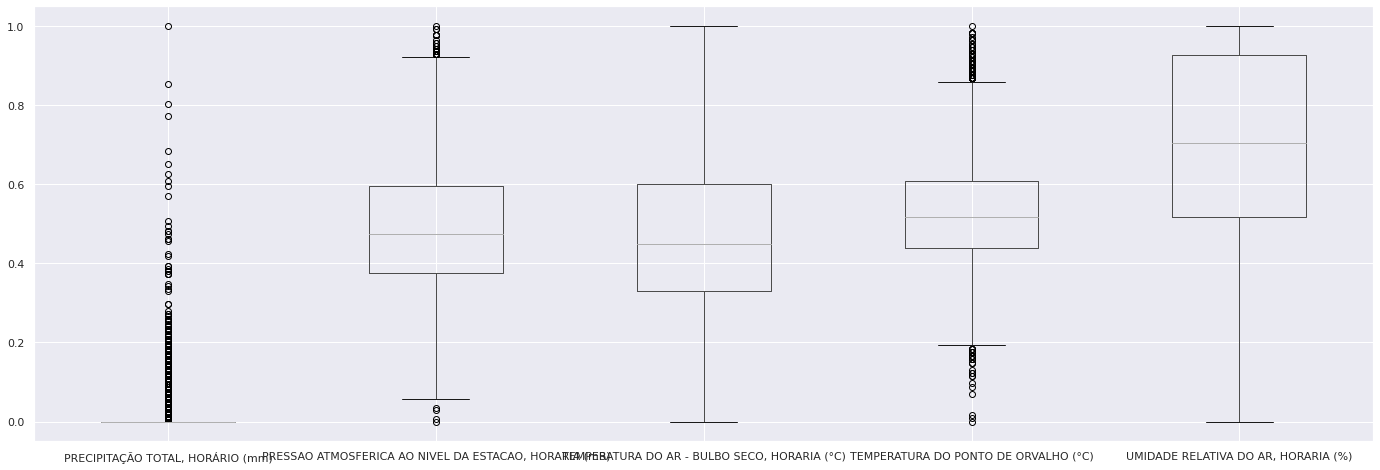

In [ ]:
clima_dados.boxplot(figsize=(24, 8))

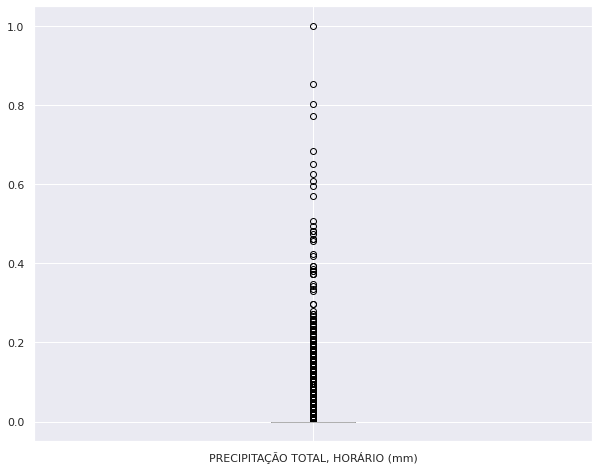

In [ ]:
clima_dados.boxplot(column=['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], figsize=(10, 8))

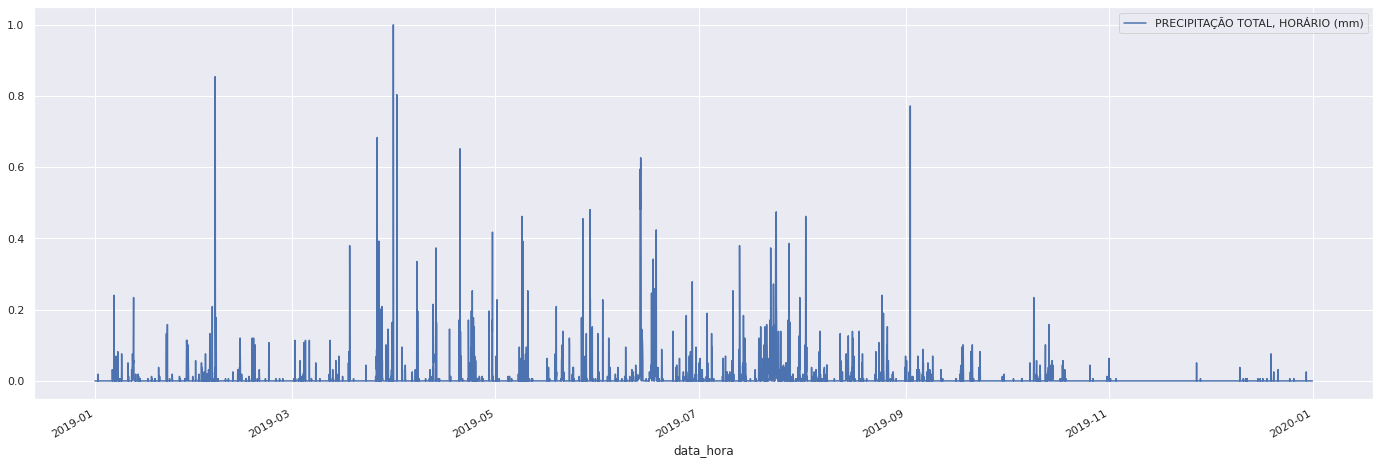

In [ ]:
clima_dados.plot.line(x='data_hora', y='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', figsize=(24, 8))

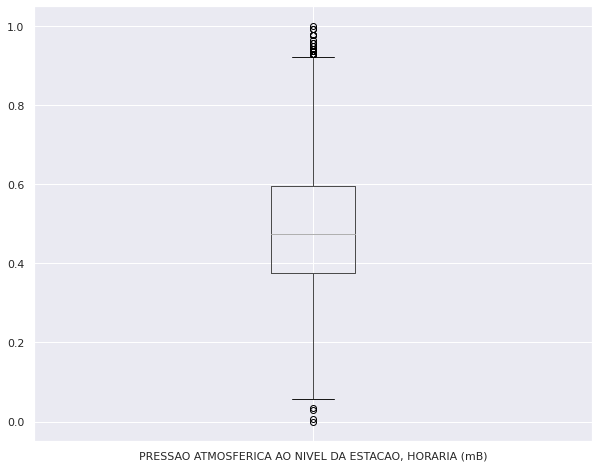

In [ ]:
clima_dados.boxplot(column=['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'], figsize=(10, 8))

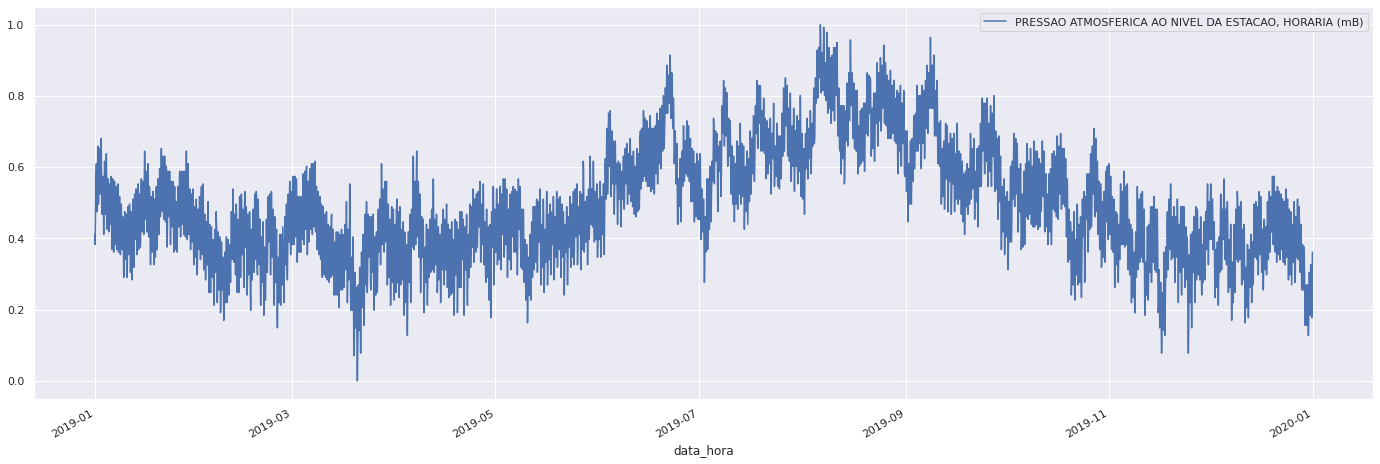

In [ ]:
clima_dados.plot.line(x='data_hora', y='PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', figsize=(24, 8))

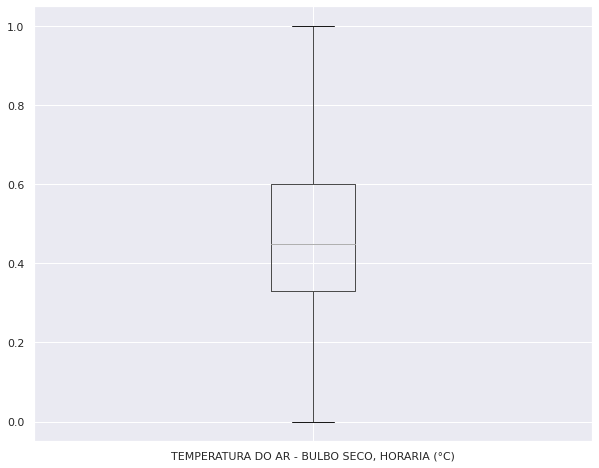

In [ ]:
clima_dados.boxplot(column=['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], figsize=(10, 8))

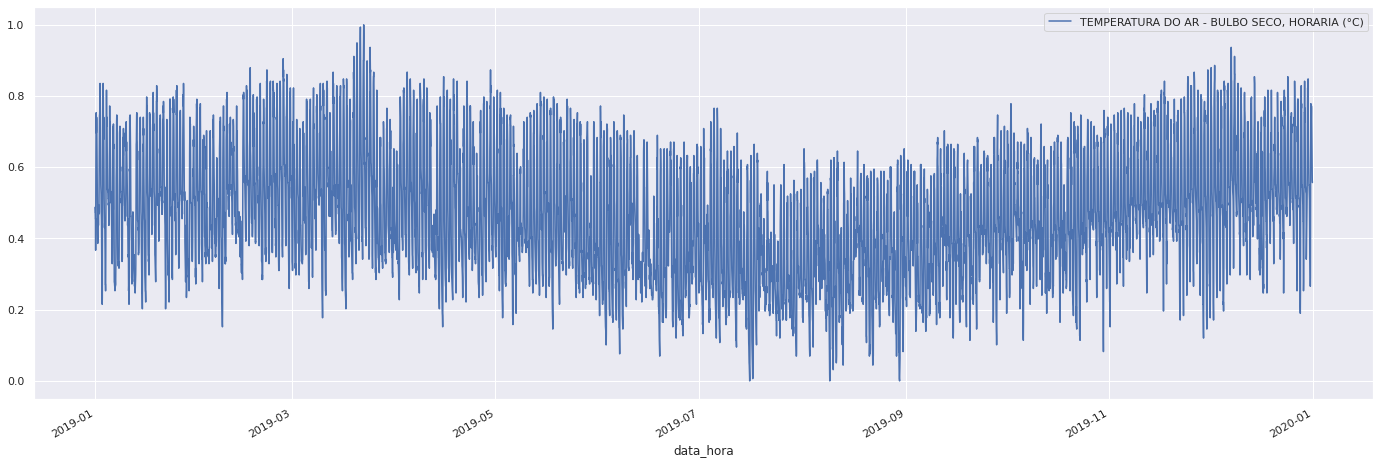

In [ ]:
clima_dados.plot.line(x='data_hora', y='TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', figsize=(24, 8))

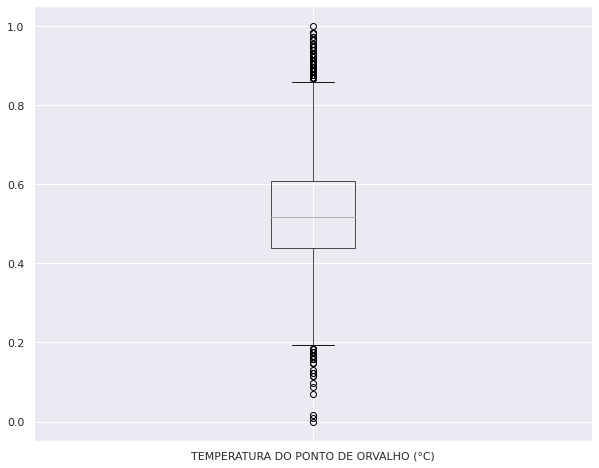

In [ ]:
clima_dados.boxplot(column=['TEMPERATURA DO PONTO DE ORVALHO (°C)'], figsize=(10, 8))

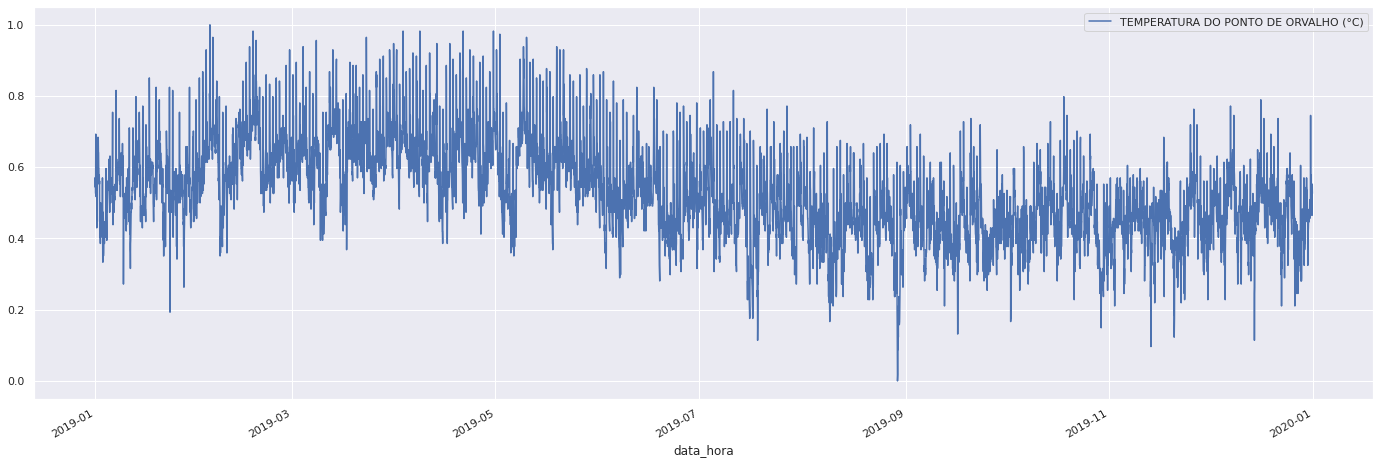

In [ ]:
clima_dados.plot.line(x='data_hora', y='TEMPERATURA DO PONTO DE ORVALHO (°C)', figsize=(24, 8))

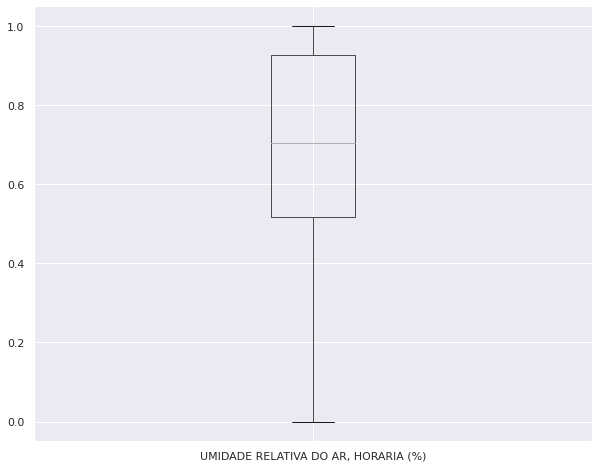

In [ ]:
clima_dados.boxplot(column=['UMIDADE RELATIVA DO AR, HORARIA (%)'], figsize=(10, 8))

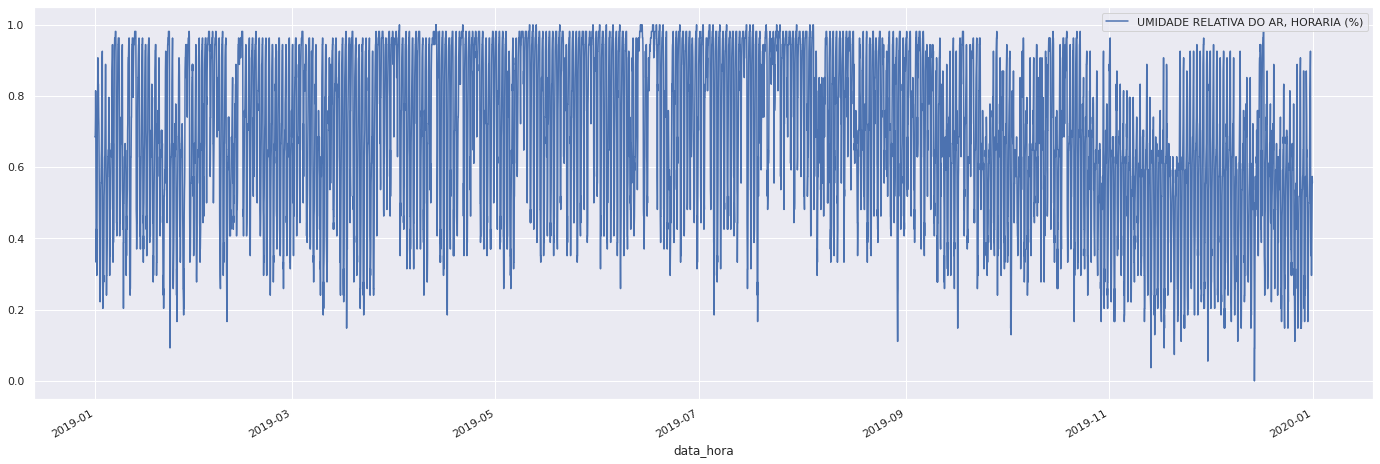

In [ ]:
clima_dados.plot.line(x='data_hora', y='UMIDADE RELATIVA DO AR, HORARIA (%)', figsize=(24, 8))

# Clima: análise

In [ ]:
clima_dados

,data_hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)"
0,2019-01-01 00:00:00,0.0,1011.8,26.3,22.0,77.0
1,2019-01-01 01:00:00,0.0,1011.4,26.1,21.8,77.0
2,2019-01-01 02:00:00,0.0,1011.7,26.1,21.8,77.0
3,2019-01-01 03:00:00,0.0,1012.1,25.8,21.7,78.0
4,2019-01-01 04:00:00,0.0,1012.5,25.8,22.0,80.0
...,...,...,...,...,...,...
8747,2019-12-31 16:00:00,0.0,1008.6,29.0,21.4,64.0
8748,2019-12-31 17:00:00,0.0,1008.9,28.1,20.8,65.0
8749,2019-12-31 18:00:00,0.0,1009.5,27.5,21.3,69.0
8750,2019-12-31 19:00:00,0.0,1010.3,27.5,21.8,71.0


In [ ]:
clima_dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].describe()

count    8752.000000
mean        0.237843
std         1.261565
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        31.600000
Name: PRECIPITAÇÃO TOTAL, HORÁRIO (mm), dtype: float64

In [ ]:
describe_more(clima_dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])

{'median': 0.0, 'mode': 0    0.0
 dtype: float64, 'variance': 1.5915468485500335}

In [ ]:
clima_dados['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'].describe()

count    8752.000000
mean        0.490809
std         0.159317
min         0.000000
25%         0.375887
50%         0.475177
75%         0.595745
max         1.000000
Name: PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB), dtype: float64

In [ ]:
describe_more(clima_dados['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'])

{'median': 1012.7, 'mode': 0    1012.2
 dtype: float64, 'variance': 5.046167906744253}

In [ ]:
clima_dados['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].describe()

count    8752.000000
mean       25.956056
std         2.842664
min        18.600000
25%        23.800000
50%        25.700000
75%        28.100000
max        34.400000
Name: TEMPERATURA DO AR - BULBO SECO, HORARIA (°C), dtype: float64

In [ ]:
describe_more(clima_dados['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'])

{'median': 25.7, 'mode': 0    25.1
 dtype: float64, 'variance': 8.080735806740831}

In [ ]:
clima_dados['UMIDADE RELATIVA DO AR, HORARIA (%)'].describe()

count    8752.000000
mean       77.599520
std        12.524082
min        40.000000
25%        68.000000
50%        78.000000
75%        90.000000
max        94.000000
Name: UMIDADE RELATIVA DO AR, HORARIA (%), dtype: float64

In [ ]:
describe_more(clima_dados['UMIDADE RELATIVA DO AR, HORARIA (%)'])

{'median': 78.0, 'mode': 0    92.0
 dtype: float64, 'variance': 156.85262461254965}

# Acidentes: pré-processamento

In [ ]:
#sem ajustes para importar o csv
url_acidentes = 'https://raw.githubusercontent.com/tcnl/if697-projeto-01/master/data/acidentes-2019.csv'
dados_acidentes = pd.read_csv(url_acidentes, sep=';')

In [ ]:
# Colunas não relevantes ou redundantes
dados_acidentes.drop(columns=['situacao', 'detalhe_endereco_acidente', 'complemento', 'endereco_cruzamento', 'referencia_cruzamento', 'bairro_cruzamento', 'num_semaforo',
                              'descricao', 'ponto_controle', 'numero_cruzamento', 'divisao_via1', 'divisao_via2', 'divisao_via3', 'situacao_placa', 'sentido_via'], inplace=True)
dados_acidentes

,DATA,hora,natureza_acidente,bairro,endereco,numero,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,velocidade_max_via,mao_direcao
0,2019-01-01,00:41:00,SEM VÍTIMA,IPSEP,AV RECIFE,NaN,COLISÃO TRASEIRA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,60 km/h,Única
1,2019-01-01,01:37:00,SEM VÍTIMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,NaN,ABALROAMENTO TRANSVERSAL,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,NaN,Única
2,2019-01-01,14:20:00,SEM VÍTIMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,NaN,COLISÃO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,02:53:00,SEM VÍTIMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,100,COLISÃO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,08:17:00,COM VÍTIMA,JAQUEIRA,RUA TITO ROSAS,63,COLISÃO COM CICLISTA,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,40 km/h,Única
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12057,2019-12-31,13:37:00,SEM VÍTIMA,VÁRZEA,AV AFONSO OLINDENSE,NaN,COLISÃO,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12058,2019-12-31,13:39:00,SEM VÍTIMA,BOA VIAGEM,RUA TENENTE DOMINGOS DE BRITO,1002,COLISÃO,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12059,2019-12-31,14:30:00,SEM VÍTIMA,CASA AMARELA,RUA XAVANTES,NaN,ABALROAMENTO TRANSVERSAL,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,40 km/h,Dupla
12060,2019-12-31,15:40:00,SEM VÍTIMA,BARRO,RUA DA ESPERANCA,NaN,COLISÃO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados_acidentes.dtypes

DATA                    object
hora                    object
natureza_acidente       object
bairro                  object
endereco                object
numero                  object
tipo                    object
auto                   float64
moto                   float64
ciclom                 float64
ciclista               float64
pedestre               float64
onibus                 float64
caminhao               float64
viatura                float64
outros                 float64
vitimas                float64
vitimasfatais          float64
acidente_verificado     object
tempo_clima             object
situacao_semaforo       object
sinalizacao             object
condicao_via            object
conservacao_via         object
velocidade_max_via      object
mao_direcao             object
dtype: object

In [ ]:
#formatação das colunas de data e hora em uma só
dados_acidentes_datahora = pd.to_datetime(dados_acidentes['DATA'] + ' ' + dados_acidentes['hora'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
dados_acidentes_datahora

0       2019-01-01 00:41:00
1       2019-01-01 01:37:00
2       2019-01-01 14:20:00
3       2019-01-01 02:53:00
4       2019-01-01 08:17:00
                ...        
12057   2019-12-31 13:37:00
12058   2019-12-31 13:39:00
12059   2019-12-31 14:30:00
12060   2019-12-31 15:40:00
12061   2019-12-31 22:17:00
Length: 12062, dtype: datetime64[ns]

In [ ]:
#insere data_hora no df
dados_acidentes.insert(0, 'data_hora', dados_acidentes_datahora)

In [ ]:
#remove as colunas de data e hora
dados_acidentes.drop(columns=['DATA', 'hora'], inplace=True)
dados_acidentes

,data_hora,natureza_acidente,bairro,endereco,numero,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,velocidade_max_via,mao_direcao
0,2019-01-01 00:41:00,SEM VÍTIMA,IPSEP,AV RECIFE,NaN,COLISÃO TRASEIRA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,60 km/h,Única
1,2019-01-01 01:37:00,SEM VÍTIMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,NaN,ABALROAMENTO TRANSVERSAL,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,NaN,Única
2,2019-01-01 14:20:00,SEM VÍTIMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,NaN,COLISÃO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 02:53:00,SEM VÍTIMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,100,COLISÃO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01 08:17:00,COM VÍTIMA,JAQUEIRA,RUA TITO ROSAS,63,COLISÃO COM CICLISTA,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,40 km/h,Única
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12057,2019-12-31 13:37:00,SEM VÍTIMA,VÁRZEA,AV AFONSO OLINDENSE,NaN,COLISÃO,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12058,2019-12-31 13:39:00,SEM VÍTIMA,BOA VIAGEM,RUA TENENTE DOMINGOS DE BRITO,1002,COLISÃO,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12059,2019-12-31 14:30:00,SEM VÍTIMA,CASA AMARELA,RUA XAVANTES,NaN,ABALROAMENTO TRANSVERSAL,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,40 km/h,Dupla
12060,2019-12-31 15:40:00,SEM VÍTIMA,BARRO,RUA DA ESPERANCA,NaN,COLISÃO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#limpeza dos dados
dados_acidentes['bairro'].replace(['BOMBA DO HEMETERIO', 'JOANA BEZERRA'], ['BOMBA DO HEMETÉRIO', 'ILHA JOANA BEZERRA'], inplace=True)
dados_acidentes['velocidade_max_via'].replace(['30 e 40 km/h'], [np.nan], inplace=True)
dados_acidentes['natureza_acidente'].replace(['APOIO', 'ENTRADA E SAÍDA'], [np.nan, np.nan], inplace=True)
dados_acidentes['tipo'].replace(['SUBURBIO'], [np.nan], inplace=True)

In [ ]:
#substituir NA por zero nas colunas das "partes envolvidas" no acidente
columns_to_fillna = ['auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros', 'vitimas', 'vitimasfatais']
dados_acidentes = dados_acidentes.apply(lambda x: x.fillna(0) if x.name in columns_to_fillna else x)

In [ ]:
dados_acidentes

,data_hora,natureza_acidente,bairro,endereco,numero,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,velocidade_max_via,mao_direcao
0,2019-01-01 00:41:00,SEM VÍTIMA,IPSEP,AV RECIFE,NaN,COLISÃO TRASEIRA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,60 km/h,Única
1,2019-01-01 01:37:00,SEM VÍTIMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,NaN,ABALROAMENTO TRANSVERSAL,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,NaN,Única
2,2019-01-01 14:20:00,SEM VÍTIMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,NaN,COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 02:53:00,SEM VÍTIMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,100,COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01 08:17:00,COM VÍTIMA,JAQUEIRA,RUA TITO ROSAS,63,COLISÃO COM CICLISTA,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,40 km/h,Única
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12057,2019-12-31 13:37:00,SEM VÍTIMA,VÁRZEA,AV AFONSO OLINDENSE,NaN,COLISÃO,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12058,2019-12-31 13:39:00,SEM VÍTIMA,BOA VIAGEM,RUA TENENTE DOMINGOS DE BRITO,1002,COLISÃO,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12059,2019-12-31 14:30:00,SEM VÍTIMA,CASA AMARELA,RUA XAVANTES,NaN,ABALROAMENTO TRANSVERSAL,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,40 km/h,Dupla
12060,2019-12-31 15:40:00,SEM VÍTIMA,BARRO,RUA DA ESPERANCA,NaN,COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#tratamento de NA e categorização

categories_list = ['natureza_acidente', 'bairro', 'endereco', 'tipo', 'acidente_verificado', 'tempo_clima', 
                   'situacao_semaforo', 'sinalizacao', 'condicao_via', 'conservacao_via', 'velocidade_max_via', 'mao_direcao']

dados_acidentes['natureza_acidente'].fillna('SEM VÍTIMA', inplace=True)
dados_acidentes = dados_acidentes.apply(lambda x: x.fillna('Não informado') if x.name in categories_list else x)
dados_acidentes = dados_acidentes.apply(lambda x: x.astype('category') if x.name in categories_list else x)

In [ ]:
dados_acidentes.dtypes

data_hora              datetime64[ns]
natureza_acidente            category
bairro                       category
endereco                     category
numero                         object
tipo                         category
auto                          float64
moto                          float64
ciclom                        float64
ciclista                      float64
pedestre                      float64
onibus                        float64
caminhao                      float64
viatura                       float64
outros                        float64
vitimas                       float64
vitimasfatais                 float64
acidente_verificado          category
tempo_clima                  category
situacao_semaforo            category
sinalizacao                  category
condicao_via                 category
conservacao_via              category
velocidade_max_via           category
mao_direcao                  category
dtype: object

In [ ]:
dados_acidentes = dados_acidentes.convert_dtypes()
dados_acidentes.dtypes

data_hora              datetime64[ns]
natureza_acidente            category
bairro                       category
endereco                     category
numero                         string
tipo                         category
auto                            Int64
moto                            Int64
ciclom                          Int64
ciclista                        Int64
pedestre                        Int64
onibus                          Int64
caminhao                        Int64
viatura                         Int64
outros                          Int64
vitimas                         Int64
vitimasfatais                   Int64
acidente_verificado          category
tempo_clima                  category
situacao_semaforo            category
sinalizacao                  category
condicao_via                 category
conservacao_via              category
velocidade_max_via           category
mao_direcao                  category
dtype: object

In [ ]:
dados_acidentes

,data_hora,natureza_acidente,bairro,endereco,numero,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,velocidade_max_via,mao_direcao
0,2019-01-01 00:41:00,SEM VÍTIMA,IPSEP,AV RECIFE,<NA>,COLISÃO TRASEIRA,2,0,0,0,0,0,0,0,0,0,0,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,60 km/h,Única
1,2019-01-01 01:37:00,SEM VÍTIMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,<NA>,ABALROAMENTO TRANSVERSAL,2,0,0,0,0,0,0,0,0,0,0,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não informado,Única
2,2019-01-01 14:20:00,SEM VÍTIMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,<NA>,COLISÃO,2,0,0,0,0,0,0,0,0,0,0,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado
3,2019-01-01 02:53:00,SEM VÍTIMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,100,COLISÃO,2,0,0,0,0,0,0,0,0,0,0,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado
4,2019-01-01 08:17:00,COM VÍTIMA,JAQUEIRA,RUA TITO ROSAS,63,COLISÃO COM CICLISTA,0,0,0,1,0,1,0,0,0,1,0,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,40 km/h,Única
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12057,2019-12-31 13:37:00,SEM VÍTIMA,VÁRZEA,AV AFONSO OLINDENSE,<NA>,COLISÃO,1,1,0,0,0,0,0,0,0,0,0,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado
12058,2019-12-31 13:39:00,SEM VÍTIMA,BOA VIAGEM,RUA TENENTE DOMINGOS DE BRITO,1002,COLISÃO,1,0,0,0,0,1,0,0,0,0,0,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado
12059,2019-12-31 14:30:00,SEM VÍTIMA,CASA AMARELA,RUA XAVANTES,<NA>,ABALROAMENTO TRANSVERSAL,2,0,0,0,0,0,0,0,0,0,0,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,40 km/h,Dupla
12060,2019-12-31 15:40:00,SEM VÍTIMA,BARRO,RUA DA ESPERANCA,<NA>,COLISÃO,2,0,0,0,0,0,0,0,0,0,0,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado


# Acidentes: dados ausentes

In [ ]:
#como substituir a ausência de um número de endereço?
dados_acidentes[dados_acidentes['numero'].isnull()]

,data_hora,natureza_acidente,bairro,endereco,numero,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,velocidade_max_via,mao_direcao
0,2019-01-01 00:41:00,SEM VÍTIMA,IPSEP,AV RECIFE,<NA>,COLISÃO TRASEIRA,2,0,0,0,0,0,0,0,0,0,0,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,60 km/h,Única
1,2019-01-01 01:37:00,SEM VÍTIMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,<NA>,ABALROAMENTO TRANSVERSAL,2,0,0,0,0,0,0,0,0,0,0,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não informado,Única
2,2019-01-01 14:20:00,SEM VÍTIMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,<NA>,COLISÃO,2,0,0,0,0,0,0,0,0,0,0,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado
9,2019-01-01 16:01:00,COM VÍTIMA,CAMPO GRANDE,EST DE BELEM,<NA>,ATROPELAMENTO,1,0,0,0,0,0,0,0,0,1,0,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado
11,2019-01-01 19:26:00,SEM VÍTIMA,ENGENHO DO MEIO,RUA ANTONIO CURADO,<NA>,ABALROAMENTO TRANSVERSAL,2,0,0,0,0,0,0,0,0,0,0,Cruzamento,Bom,Não existe,Incompleta,Seca,Mal iluminada,Não informado,Dupla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12055,2019-12-31 10:53:00,SEM VÍTIMA,TORRÕES,AV ENGENHEIRO ABDIAS DE CARVALHO,<NA>,COLISÃO,0,1,0,0,0,0,1,0,0,0,0,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado
12056,2019-12-31 12:52:00,SEM VÍTIMA,ESTÂNCIA,AV RECIFE,<NA>,COLISÃO TRASEIRA,2,0,0,0,0,0,0,0,0,0,0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não informado,Dupla
12057,2019-12-31 13:37:00,SEM VÍTIMA,VÁRZEA,AV AFONSO OLINDENSE,<NA>,COLISÃO,1,1,0,0,0,0,0,0,0,0,0,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado,Não informado
12059,2019-12-31 14:30:00,SEM VÍTIMA,CASA AMARELA,RUA XAVANTES,<NA>,ABALROAMENTO TRANSVERSAL,2,0,0,0,0,0,0,0,0,0,0,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,40 km/h,Dupla


# Acidentes: categorias

In [ ]:
dados_acidentes.dtypes

data_hora              datetime64[ns]
natureza_acidente            category
bairro                       category
endereco                     category
numero                         string
tipo                         category
auto                            Int64
moto                            Int64
ciclom                          Int64
ciclista                        Int64
pedestre                        Int64
onibus                          Int64
caminhao                        Int64
viatura                         Int64
outros                          Int64
vitimas                         Int64
vitimasfatais                   Int64
acidente_verificado          category
tempo_clima                  category
situacao_semaforo            category
sinalizacao                  category
condicao_via                 category
conservacao_via              category
velocidade_max_via           category
mao_direcao                  category
dtype: object

In [ ]:
dados_acidentes['natureza_acidente'].cat.categories

Index(['COM VÍTIMA', 'SEM VÍTIMA', 'VÍTIMA FATAL'], dtype='object')

In [ ]:
dados_acidentes['bairro'].cat.categories
#bomba do hemetério duplicada. com e sem acento. ---> corrigido
#ilha joana bezerra duplicada. sem o "ilha" ---> corrigido

Index(['AFLITOS', 'AFOGADOS', 'ALTO DO MANDU', 'ALTO JOSÉ BONIFÁCIO',
       'ALTO JOSÉ DO PINHO', 'ALTO SANTA TERESINHA', 'APIPUCOS', 'AREIAS',
       'ARRUDA', 'BAIRRO DO RECIFE', 'BARRO', 'BEBERIBE', 'BOA VIAGEM',
       'BOA VISTA', 'BOMBA DO HEMETÉRIO', 'BONGI', 'BRASÍLIA TEIMOSA',
       'BREJO DA GUABIRABA', 'BREJO DE BEBERIBE', 'CABANGA', 'CAJUEIRO',
       'CAMPINA DO BARRETO', 'CAMPO GRANDE', 'CASA AMARELA', 'CASA FORTE',
       'CAXANGÁ', 'CAÇOTE', 'CIDADE UNIVERSITÁRIA', 'COELHOS', 'COHAB',
       'COQUEIRAL', 'CORDEIRO', 'CURADO', 'CÓRREGO DO JENIPAPO', 'DERBY',
       'DOIS IRMÃOS', 'DOIS UNIDOS', 'ENCRUZILHADA', 'ENGENHO DO MEIO',
       'ESPINHEIRO', 'ESTÂNCIA', 'FUNDÃO', 'GRAÇAS', 'GUABIRABA', 'HIPÓDROMO',
       'IBURA', 'ILHA DO LEITE', 'ILHA DO RETIRO', 'ILHA JOANA BEZERRA',
       'IMBIRIBEIRA', 'IPSEP', 'IPUTINGA', 'JAQUEIRA', 'JARDIM SÃO PAULO',
       'JIQUIÁ', 'JORDÃO', 'LINHA DO TIRO', 'MACAXEIRA', 'MADALENA',
       'MANGABEIRA', 'MANGUEIRA', 'MONTEIRO', 'MOR

In [ ]:
dados_acidentes['endereco'].cat.categories

Index(['1 TRV JUSTICA E PAZ', '1PR DIAS COELHO', '1TR ALTO DA SERRINHA',
       'AV ADOLPHO BLOCH', 'AV ADVOGADO JOSE PAULO CAVALCANTI',
       'AV AFONSO OLINDENSE', 'AV ALFREDO LISBOA', 'AV ANIBAL BENEVOLO',
       'AV ANTONIO DE GOES', 'AV ANTONIO TORRES GALVAO',
       ...
       'TUNEL DA ABOLICAO', 'TUNEL FELIPE CAMARAO', 'TUNEL MANOEL DE BRITO',
       'VDO DAS CINCO PONTAS', 'VDO ENG ROBERTO PEREIRA DE CARVALHO',
       'VDO INDEPENDENCIA', 'VDO PAPA JOAO PAULO II', 'VIADUTO CAPITAO TEMUDO',
       'VIADUTO TANCREDO NEVES', 'av norte'],
      dtype='object', length=1392)

In [ ]:
dados_acidentes['tipo'].cat.categories
#erro: 'suburbio' --> corrigido

Index(['ABALROAMENTO LONGITUDINAL', 'ABALROAMENTO TRANSVERSAL',
       'ACID. DE PERCURSO', 'ATROPELAMENTO', 'ATROPELAMENTO ANIMAL',
       'CAPOTAMENTO', 'CHOQUE', 'CHOQUE OBJETO FIXO', 'CHOQUE VEÍCULO PARADO',
       'COLISÃO', 'COLISÃO COM CICLISTA', 'COLISÃO FRONTAL',
       'COLISÃO TRASEIRA', 'ENGAVETAMENTO', 'Não informado', 'TOMBAMENTO'],
      dtype='object')

In [ ]:
dados_acidentes['acidente_verificado'].cat.categories

Index(['Cruzamento', 'Esquina', 'Longo da via', 'Não informado', 'Outros',
       'Ponte', 'Viaduto'],
      dtype='object')

In [ ]:
dados_acidentes['tempo_clima'].cat.categories

Index(['Bom', 'Chuvoso', 'Nublado', 'Não informado'], dtype='object')

In [ ]:
dados_acidentes['situacao_semaforo'].cat.categories

Index(['Com defeito', 'Desligado', 'Intermitente', 'Não existe',
       'Não informado', 'Sem defeito'],
      dtype='object')

In [ ]:
dados_acidentes['sinalizacao'].cat.categories

Index(['Ilegível', 'Incompleta', 'Não existente', 'Não informado',
       'Perfeito estado'],
      dtype='object')

In [ ]:
dados_acidentes['condicao_via'].cat.categories

Index(['Molhada', 'Não informado', 'Oleosa', 'Outros', 'Seca'], dtype='object')

In [ ]:
dados_acidentes['conservacao_via'].cat.categories

Index(['Mal conservada', 'Mal iluminada', 'Não informado', 'Outros',
       'Perfeito estado'],
      dtype='object')

In [ ]:
dados_acidentes['velocidade_max_via'].cat.categories
# o que fazer com esse "30 e 40?" --> dado removido

Index(['10 km/h', '20 km/h', '30 km/h', '40 km/h', '50 km/h', '60 km/h',
       'Não informado'],
      dtype='object')

In [ ]:
dados_acidentes['mao_direcao'].cat.categories

Index(['Dupla', 'Inglesa', 'Não informado', 'Única'], dtype='object')

# Acidentes: plots

In [ ]:
dados_acidentes.count()

data_hora              12044
natureza_acidente      12062
bairro                 12062
endereco               12062
numero                  6013
tipo                   12062
auto                   12062
moto                   12062
ciclom                 12062
ciclista               12062
pedestre               12062
onibus                 12062
caminhao               12062
viatura                12062
outros                 12062
vitimas                12062
vitimasfatais          12062
acidente_verificado    12062
tempo_clima            12062
situacao_semaforo      12062
sinalizacao            12062
condicao_via           12062
conservacao_via        12062
velocidade_max_via     12062
mao_direcao            12062
dtype: int64

In [ ]:
categories_list

['natureza_acidente',
 'bairro',
 'endereco',
 'tipo',
 'acidente_verificado',
 'tempo_clima',
 'situacao_semaforo',
 'sinalizacao',
 'condicao_via',
 'conservacao_via',
 'velocidade_max_via',
 'mao_direcao']

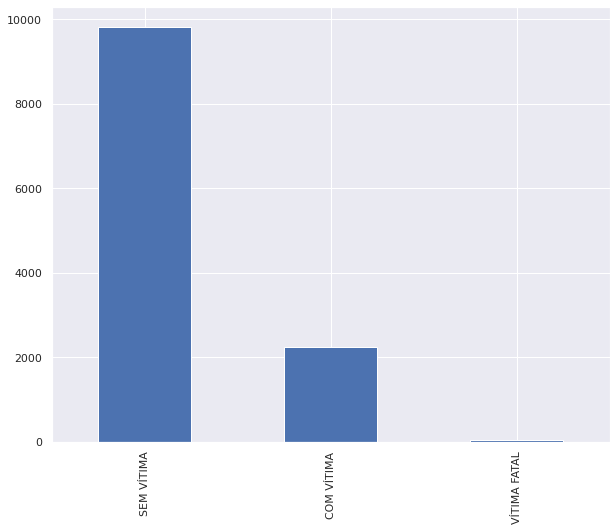

In [ ]:
dados_acidentes['natureza_acidente'].value_counts().plot.bar(figsize=(10, 8))

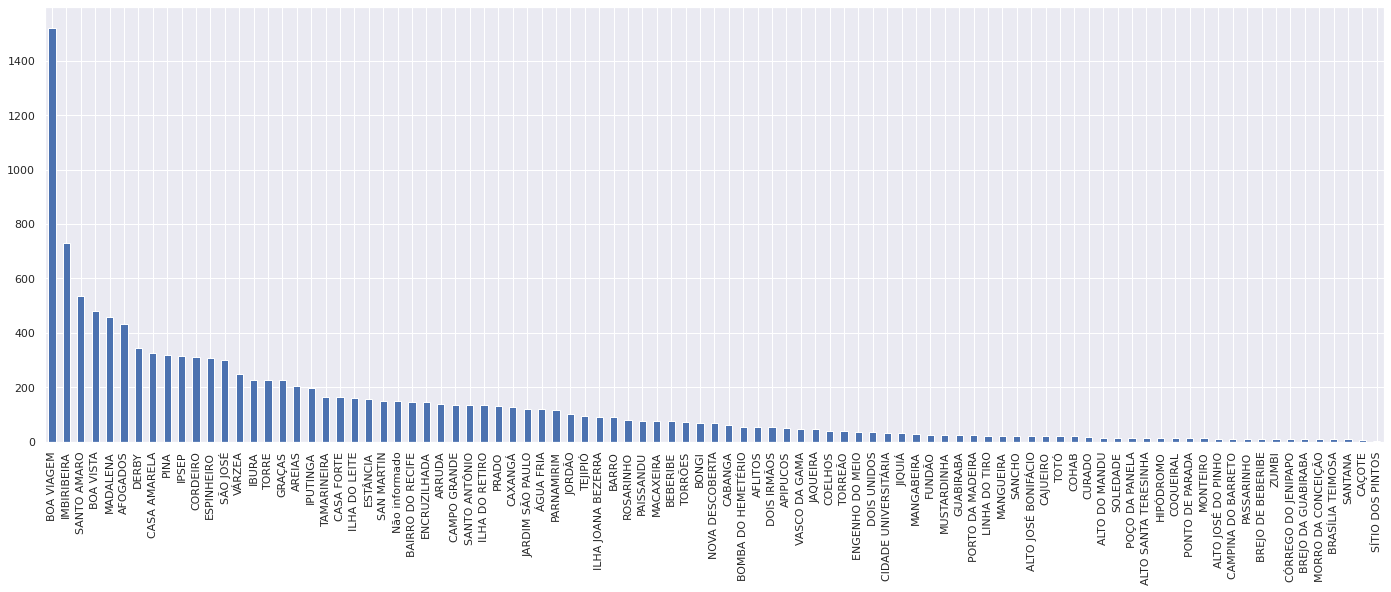

In [ ]:
dados_acidentes['bairro'].value_counts().plot.bar(figsize=(24, 8))

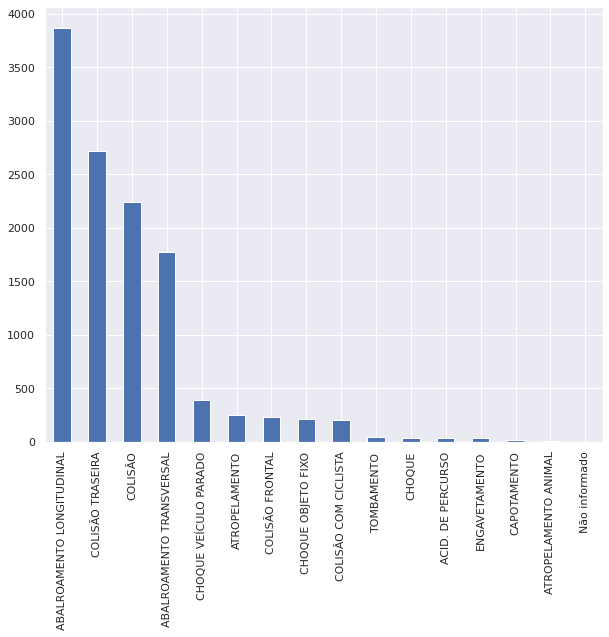

In [ ]:
dados_acidentes['tipo'].value_counts().plot.bar(figsize=(10, 8))

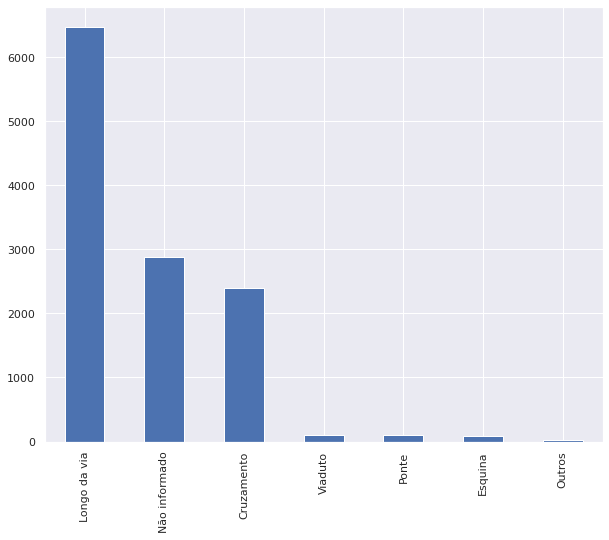

In [ ]:
dados_acidentes['acidente_verificado'].value_counts().plot.bar(figsize=(10, 8))

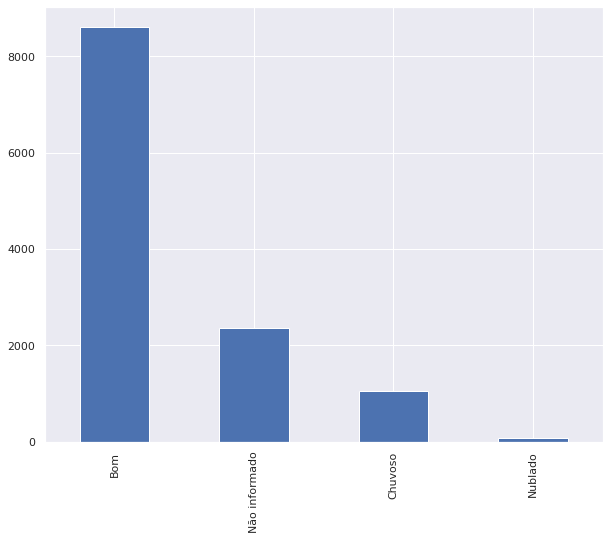

In [ ]:
dados_acidentes['tempo_clima'].value_counts().plot.bar(figsize=(10, 8))

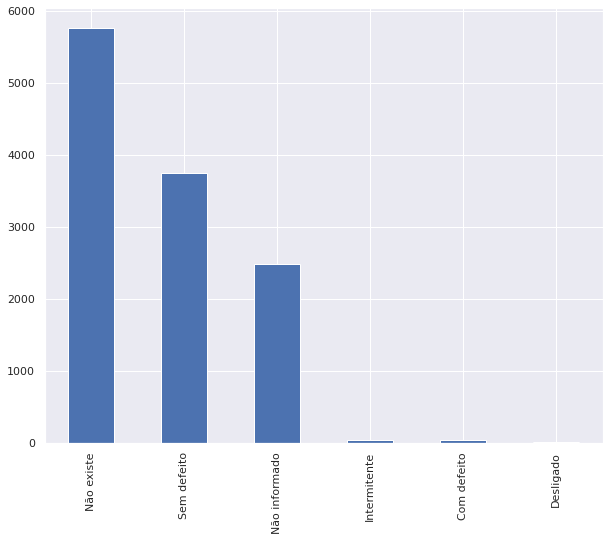

In [ ]:
dados_acidentes['situacao_semaforo'].value_counts().plot.bar(figsize=(10, 8))

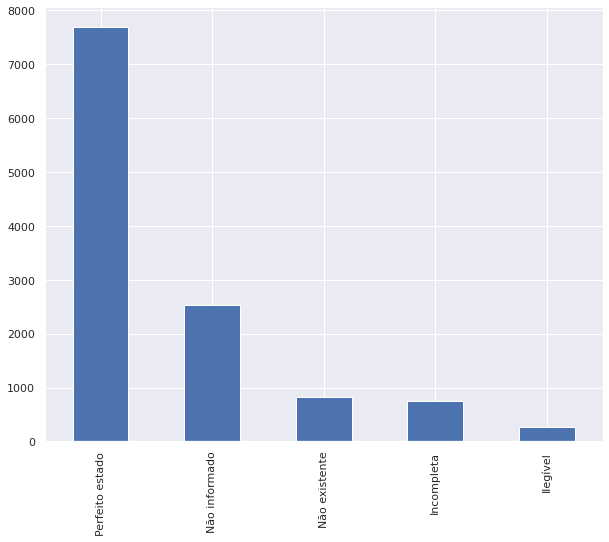

In [ ]:
dados_acidentes['sinalizacao'].value_counts().plot.bar(figsize=(10, 8))

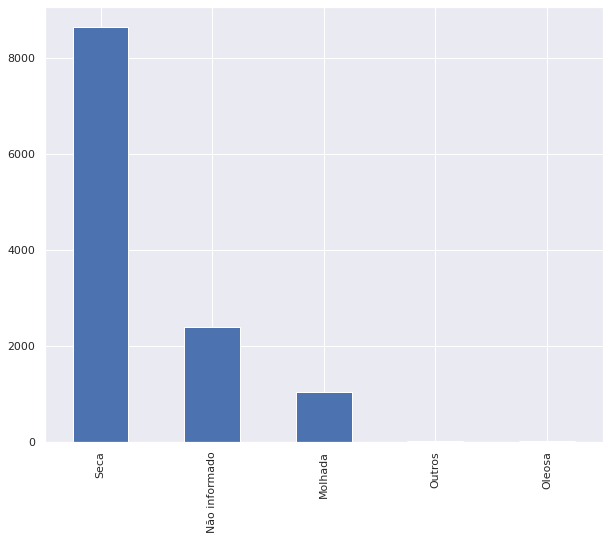

In [ ]:
dados_acidentes['condicao_via'].value_counts().plot.bar(figsize=(10, 8))

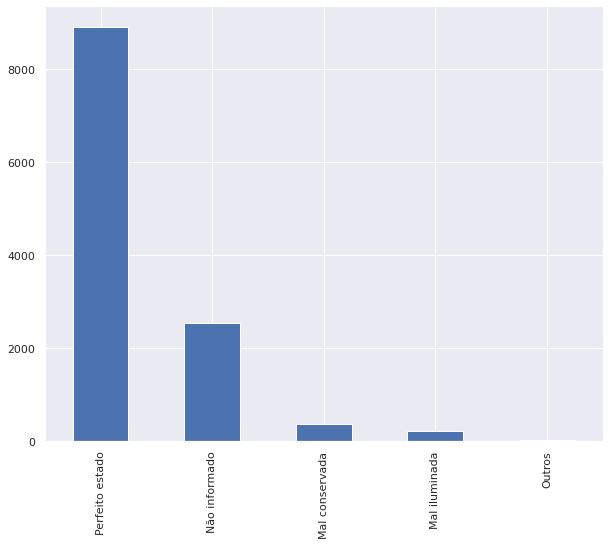

In [ ]:
dados_acidentes['conservacao_via'].value_counts().plot.bar(figsize=(10, 8))

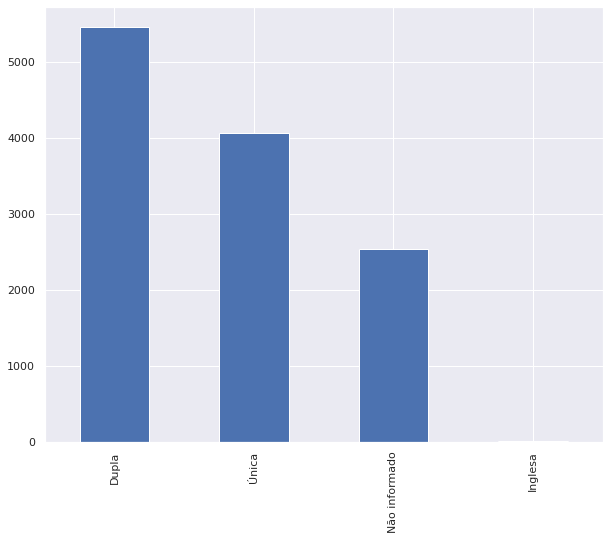

In [ ]:
dados_acidentes['mao_direcao'].value_counts().plot.bar(figsize=(10, 8))

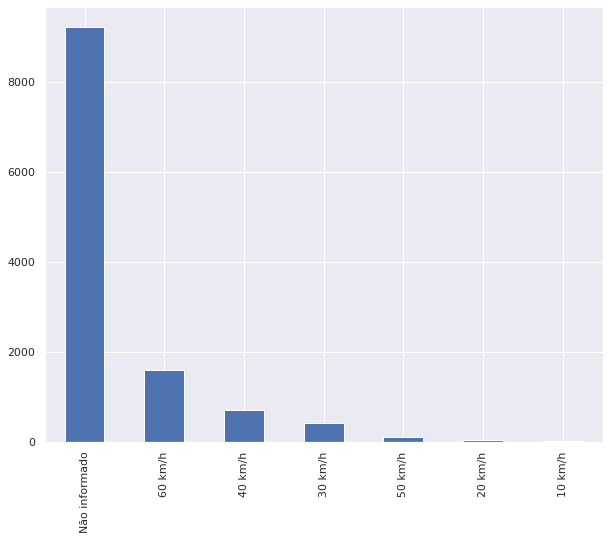

In [ ]:
dados_acidentes['velocidade_max_via'].value_counts().plot.bar(figsize=(10, 8))

# Visualização



## Exportando dados para serem usados com o Streamlit

In [ ]:
dados_acidentes.to_csv('./acidentes.csv')
clima_dados.to_csv('./clima.csv')

## Instalação dos pacotes necessarios para visualização
- Streamlit
- Pydeck
- Ploty
- Ngrok

In [ ]:
!pip install -q streamlit

     |████████████████████████████████| 7.4MB 5.0MB/s 
     |████████████████████████████████| 163kB 48.2MB/s 
     |████████████████████████████████| 6.7MB 32.4MB/s 
     |████████████████████████████████| 4.4MB 35.8MB/s 
     |████████████████████████████████| 112kB 38.7MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
     |████████████████████████████████| 133kB 48.7MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 122kB 44.3MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.4 which is incompatible.


In [ ]:
!pip install -q pydeck

In [ ]:
!pip install -q plotly.express

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-10-16 20:46:33--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.71.209.190, 52.21.51.142, 18.214.66.67, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.71.209.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  18.9MB/s    in 0.7s    

2020-10-16 20:46:34 (18.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


## Arquivo .py de onde o Streamlit lê os dados e visualizações
O DataFrame na URL_COORD (line 21) é essencialmente o mesmo utilizado ao longo do Notebook, com a diferença dele possuir os campos 'latitude' e 'longitude'. Que foram adquiridos usando o geopy + MapQuest, mas por limitações da API foi melhor salvar logo essas coordenadas em um arquivo externo.
O Codigo usado para isso segue abaixo



```python
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
import numpy as np

Ngeolocator = Nominatim(user_agent="dThKuDoTFzwxDSYNafEGkPv9km3e83Wy")
Ngeocode = RateLimiter(Ngeolocator.geocode, min_delay_seconds=0.5)

dados_acidentes['coord'] = dados_acidentes['end'].apply(Ngeocode).apply(lambda location: (location.latitude, location.longitude) if (location is not None) else np.NaN)
```



### Alguns problemas foram encontrados como alguns locais com quantidades expressivas sendo apontados para as coordenadas erradas, então um leve tratamento foi feito:



```python
dados_acidentes[['latitude', 'longitude']] = pd.DataFrame(dados_acidentes['coord'].tolist(), index=dados_acidentes.index)
dados_acidentes.loc[dados_acidentes['endereco'] == 'AV NORTE', 'latitude'] = -8.027844
dados_acidentes.loc[dados_acidentes['endereco'] == 'AV NORTE', 'longitude'] = -34.903102
dados_acidentes.sort_values(['bairro']).fillna(method='ffill').drop(['coord'], axis='columns').to_csv('./dados_acidentes_coord.csv')
```
- Av Norte estava apontando para uma Av homonima em Surubin, então forcei as coordenadas para um ponto mais central dela aqui em Recife.  
- Os NaN, quando um request não retornava nenhuma coordenada, foram tradados assim, ordenando o DF pelo 'bairro' e usando um forward-fill no fillna(), já que como a maioria dos bairros não possuem um tamanho expressivo, a diferença real será pequena.
- Após isso o CSV foi exportado e enviado para o GitHub.



In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pydeck as pdk
import plotly.express as px
import datetime
import altair as alt
from scipy.stats import ttest_ind
from scipy import stats


PAGE_CONFIG = {
  "page_title": "Projeto 01",
  "page_icon": ":smiley:",
  "layout": "centered"
}

@st.cache(persist=True)
def load_data():
  URL_COORD = 'https://raw.githubusercontent.com/tcnl/if697-projeto-01/master/data/dados_acidentes_coord.csv'
  dados_acidentes = pd.read_csv(URL_COORD, parse_dates = ['data_hora'], index_col=0)
  dados_acidentes.sort_index(inplace=True)

  df = pd.read_csv('./acidentes.csv', parse_dates = ['data_hora'], index_col=0)
  df.sort_index(inplace=True)

  df['latitude'] = dados_acidentes['latitude']
  df['longitude'] = dados_acidentes['longitude']

  return df

st.beta_set_page_config( ** PAGE_CONFIG)
def main():
  st.title("🚗💥🚗 Projeto 01 - IF697")

  st.header("🚑 Onde acontece a maioria dos acidentes em Recife?")
  vitimas = st.slider("😵 Numero de vitimas envolvidas em acidentes 💫", 0, 7)
  data = load_data()

  midpoint = (np.average(data['latitude']), np.average(data['longitude']))
  st.write(pdk.Deck(
    map_style = "mapbox://styles/mapbox/streets-v11",
    initial_view_state = {
      "latitude": midpoint[0],
      "longitude": midpoint[1],
      "zoom": 11,
      "pitch": 50,
    },
    layers = [
      pdk.Layer(
        "HexagonLayer",
        data = data.query('vitimas >= @vitimas')[["latitude", "longitude"]],
        get_position = ['longitude', 'latitude'],
        radius = 150,
        extruded = True,
        pickable = True,
        elevation_scale = 4,
        elevation_range = [25, 1050],
      ),
    ]
  ))

  ##Slider Acidentes / min dentro das horas A e B(ex: 10 h - 11 h)
  st.header("Quantos acidentes ocorreram entre as datas?")

  dados_acidentes = load_data()

  dados_min = dados_acidentes.data_hora.min()
  dados_max = dados_acidentes.data_hora.max()

  start_date = st.date_input('Start date', value=dados_min, min_value=dados_min, max_value=dados_max)
  end_date = st.date_input('End date', value=start_date, min_value=start_date, max_value=dados_max)

  hour = st.slider("🕐 Horarário para visualizar", 0, 23)
  data = dados_acidentes.query('data_hora <= @end_date and data_hora >= @start_date')
  data_min = data[data['data_hora'].dt.hour == hour]

  st.subheader("🕐 Análise minuto a minuto entre %i:00 e %i:00" % (hour, (hour + 1) % 24))

  
  filtered = data_min[(data_min['data_hora'].dt.hour >= hour) & (data_min['data_hora'].dt.hour < (hour + 1))]
  
  hist = np.histogram(filtered['data_hora'].dt.minute, bins = 60, range = (0, 60))[0]
  
  chart_data = pd.DataFrame({
    'minuto': range(60),
    'acidentes': hist
  })
  
  fig = px.bar(chart_data, x = 'minuto', y = 'acidentes', hover_data = ['minuto', 'acidentes'], height = 400)
  st.write(fig)

  # Dados por Coluna
  st.header('📊 Visualizar Dados por Coluna')
  graph_opts = st.selectbox(label='Coluna para visualizar', options=['natureza_acidente', 'bairro','tipo','acidente_verificado', 'tempo_clima', 'situacao_semaforo','sinalizacao', 'condicao_via', 'conservacao_via', 'velocidade_max_via', 'mao_direcao'])
  st.bar_chart(data=dados_acidentes[graph_opts].value_counts(), width=0, height=400, use_container_width=True)

  #Testes de Hipotese
  df = pd.read_csv('./acidentes.csv', parse_dates = ['data_hora'], index_col=0)
  df.tipo = df.tipo.astype('category')
  df.tempo_clima = df.tempo_clima.astype('category')
  df.situacao_semaforo = df.situacao_semaforo.astype('category')
  df.condicao_via = df.condicao_via.astype('category')
  df.conservacao_via = df.conservacao_via.astype('category')
  df.mao_direcao = df.mao_direcao.astype('category')


  st.header('Testes de Hipótese Quantidade de Vitimas vs Tipo de Acidente')

  st.subheader('T-Teste Independente')
  ttest,pval = ttest_ind(df['vitimas'], df['tipo'].cat.codes)
  st.write("p-value",pval)
  if pval <0.05:
    st.write("Teste Rejeitado")
  else:
    st.write("Teste Aceito")

  st.subheader("T-Teste Pareado")

  columns = ['tipo', 'tempo_clima', 'situacao_semaforo', 'condicao_via', 'conservacao_via', 'mao_direcao']

  fixa = st.selectbox(label='Selecione a Coluna que será FIXA', options=columns)

  varia = st.selectbox(label='Selecione a Coluna que irá VARIAR', options=list(set(columns) - set([fixa])))
  varia_carac = st.selectbox(label='Selecione o VALOR da coluna que irá VARIAR', options=list(df[varia].cat.categories))


  A = df.query("{0} == '{1}'".format(varia, varia_carac))['{0}'.format(fixa)]
  B = df.query("{0} != '{1}'".format(varia, varia_carac))['{0}'.format(fixa)]

  smlr_len = len(A)
  if len(B) < len(A): smlr_len = len(B)

  ttest,pval = stats.ttest_rel(A.head(smlr_len).cat.codes, B.head(smlr_len).cat.codes )

  st.write("T-Teste Pareado relação entre: {0} e {1} sendo {2}".format(fixa, varia, varia_carac))
  st.write('p-value: ',pval)
  if pval<0.05:
      st.write("Teste Rejeitado")
  else:
      st.write("Teste Aceito")
  
  if st.checkbox("Dados Livres", False):
    st.subheader('Dados Livres')
    st.write(load_data())


if __name__ == '__main__':
  main()

Overwriting app.py


## Aqui é a parte onde o Ngrok irá criar um tunel capaz de expor o Streamlit do Colab para acesso externo.  
A principio está funcionando, caso o Sr. encontre algum erro para acessar o Streamlit, execute as proximas três Cells com um intervalo entre elas.

Gera o tunel na porta 8501 (Streamlit)  
Sleep para dar tempo do tunel ficar visivel para a proxima Cell

In [ ]:
import time
get_ipython().system_raw('./ngrok http 8501 &')
time.sleep(1)

 Cria o link de acesso, só clicar :D
 - Qualquer problema, só 'parar a cell do streamlit' e rodar as ultimas 3 cells do notebook


In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://3c84e5e0054f.ngrok.io


Roda o Streamlit na thread principal do Colab, precisa parar caso deseje alterar/rodar algo diferente.

In [ ]:
#Mudar para codigo final
!streamlit run /content/app.py


  A new version of Streamlit is available.

  See what's new at https://discuss.streamlit.io/c/announcements

  Enter the following command to upgrade:
  $ pip install streamlit --upgrade


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://104.198.107.199:8501

2020-10-16 23:54:26.510 NumExpr defaulting to 2 threads.
  Stopping...
^C
